# Reelle datasett

In [14]:
from tokenize import group

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from traitlets import observe

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [16]:
df = sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
#df["age"]
df.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [20]:
df.size

13365

In [34]:
df_f = df[['survived','age', 'sex', 'class']]
df_f.head(10)

,survived,age,sex,class
0,0,22.0,male,Third
1,1,38.0,female,First
2,1,26.0,female,Third
3,1,35.0,female,First
4,0,35.0,male,Third
5,0,NaN,male,Third
6,0,54.0,male,First
7,0,2.0,male,Third
8,1,27.0,female,Third
9,1,14.0,female,Second


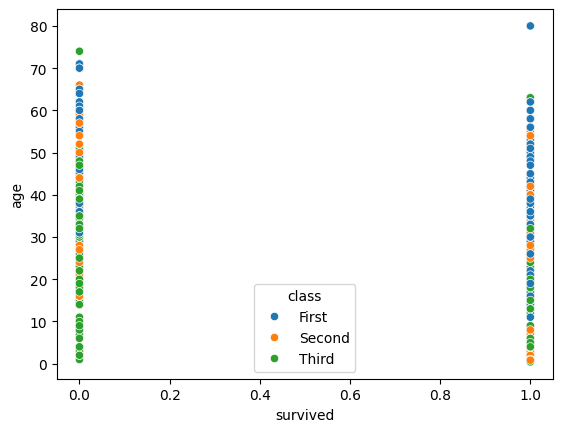

In [29]:
sns.scatterplot(df_f, y="age", x="survived", hue="class")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

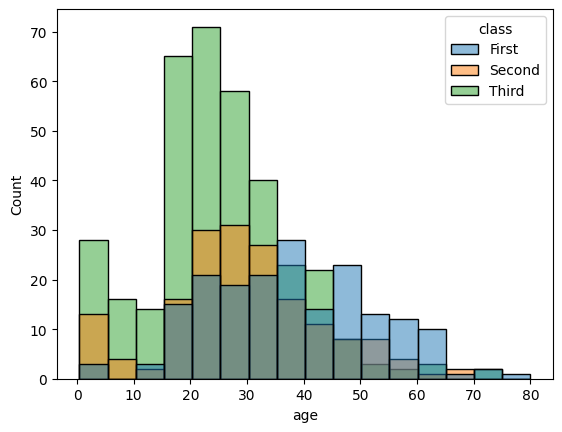

In [33]:
sns.histplot(df_f,  x="age", hue="class", bins=16)

In [50]:
df_f.sort_values(by='age', ascending=True)

,survived,age,sex,class
803,1,0.42,male,Third
755,1,0.67,male,Second
644,1,0.75,female,Third
469,1,0.75,female,Third
78,1,0.83,male,Second
...,...,...,...,...
859,0,NaN,male,Third
863,0,NaN,female,Third
868,0,NaN,male,Third
878,0,NaN,male,Third


In [54]:
df_f.groupby("class", observed=True)["age"].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [55]:
df_f.groupby("class", observed=False)["age"].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [58]:
tips = sns.load_dataset('tips')
tips["percent"] = 100*tips["tip"] / tips["total_bill"]
tips

,total_bill,tip,sex,smoker,day,time,size,percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


In [59]:
tips.groupby('sex', observed=True)["tip"].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [60]:
tips["%"] = 100*tips["tip"] / tips["total_bill"]

In [61]:
tips

,total_bill,tip,sex,smoker,day,time,size,percent,%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,14.680765
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426,9.820426


In [49]:
tips.groupby("sex")["%"].mean()

C:\Users\mareis\AppData\Local\Temp\ipykernel_22916\1387459613.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")["%"].mean()


sex
Male      15.765055
Female    16.649074
Name: %, dtype: float64

In [63]:
tips.groupby("sex")["tip"].count()

C:\Users\mareis\AppData\Local\Temp\ipykernel_22916\2924954069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby("sex")["tip"].count()


sex
Male      157
Female     87
Name: tip, dtype: int64

In [64]:
tips.groupby("day", observed=True)["percent"].mean()

day
Thur    16.127563
Fri     16.991303
Sat     15.315172
Sun     16.689729
Name: percent, dtype: float64

<Axes: xlabel='size', ylabel='total_bill'>

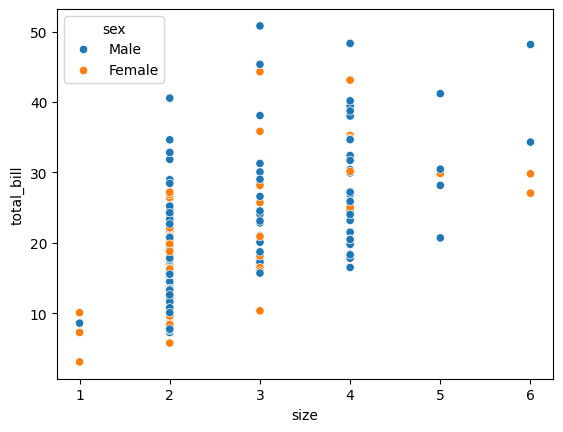

In [67]:
sns.scatterplot(tips, x="size", y="total_bill", hue="sex")